# Python version and packages installed

In [1]:
# Packages needed:
# numpy
# matplotlib
# mahotas

# which version of Python is installed?
import sys
print("Python version: {}\n\nPackages versions: ".format(sys.version))

# which package versions are installed?
import pip
all_packages = pip.get_installed_distributions()
used_packages = ["matplotlib", "numpy", "pylab", "mahotas"]
for entry in used_packages:
    for p in all_packages:
        if entry in str(p):
            print(str(p))

Python version: 2.7.13 |Anaconda custom (64-bit)| (default, Dec 20 2016, 23:09:15) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]

Packages versions: 
matplotlib 1.5.1
matplotlib-venn 0.11.3
numpy 1.12.0
mahotas 1.4.3


# Import packages into environment

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import mahotas as mh
import pylab
from pylab import imshow, gray, show
%matplotlib inline

/home/wolverine/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Import image

uint8


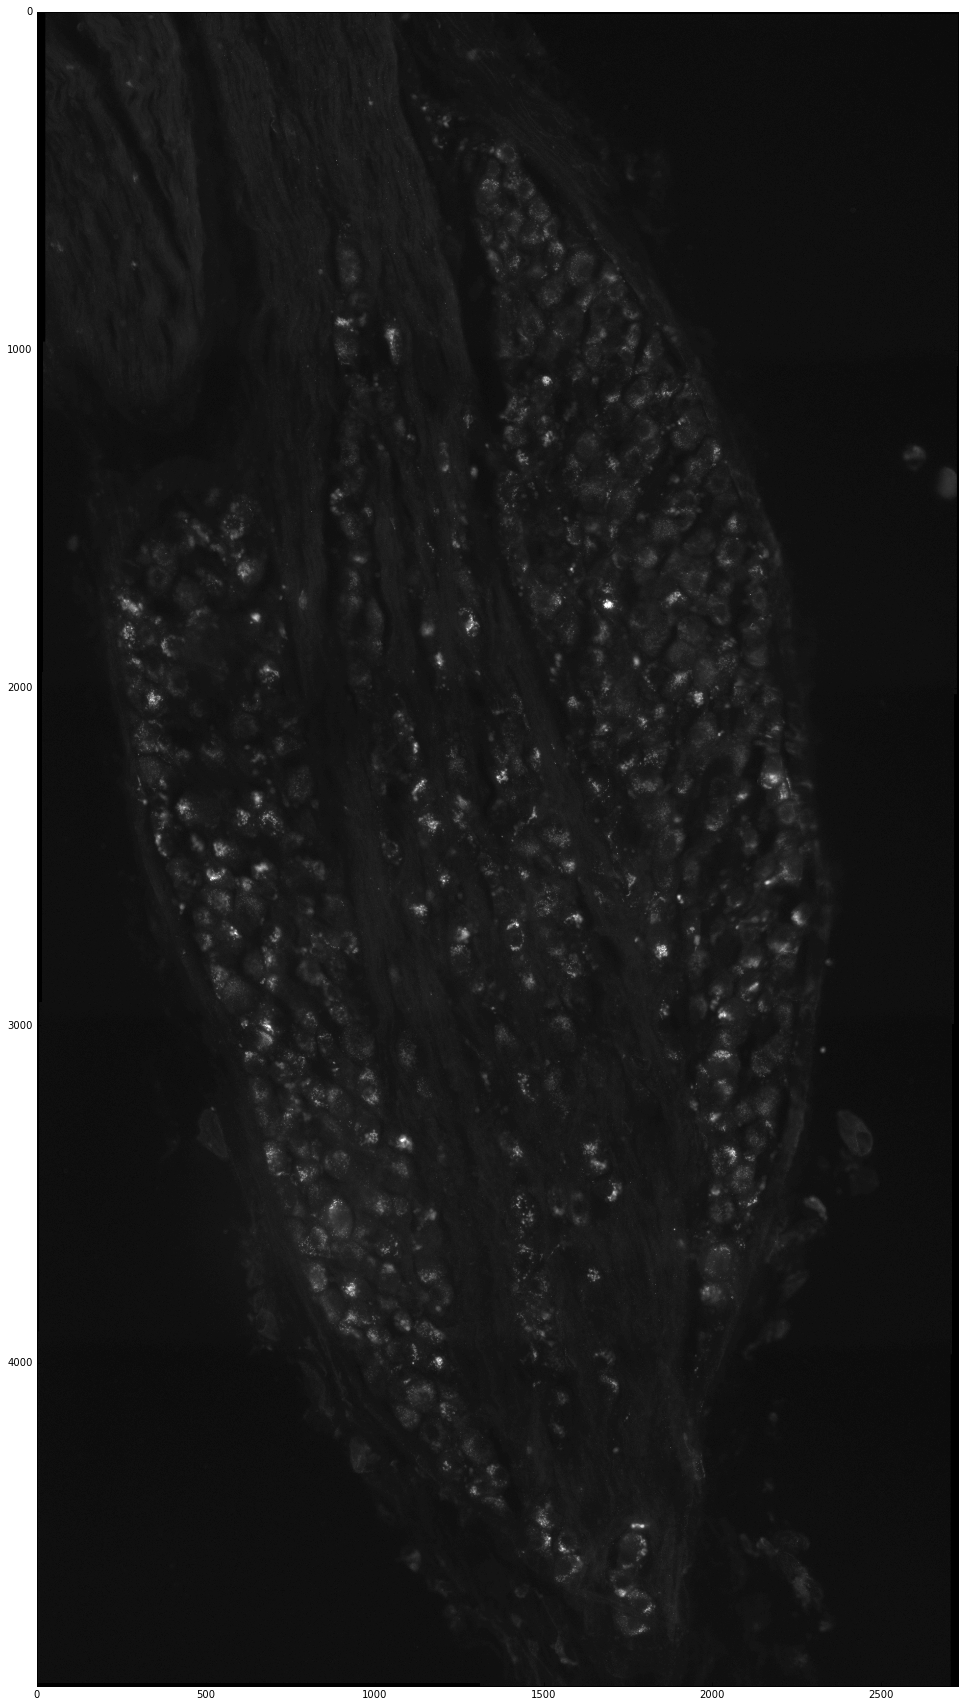

In [3]:
plt.figure(figsize=(60,30))

IM = mh.imread('TestNodose.png')  # Loads in image
print IM.dtype                    # prints image type
pylab.imshow(IM)                  # shows image
pylab.gray()                      # makes it greyscale
pylab.show()

# Run filter and thresholding then count cells

Found 105 cells.


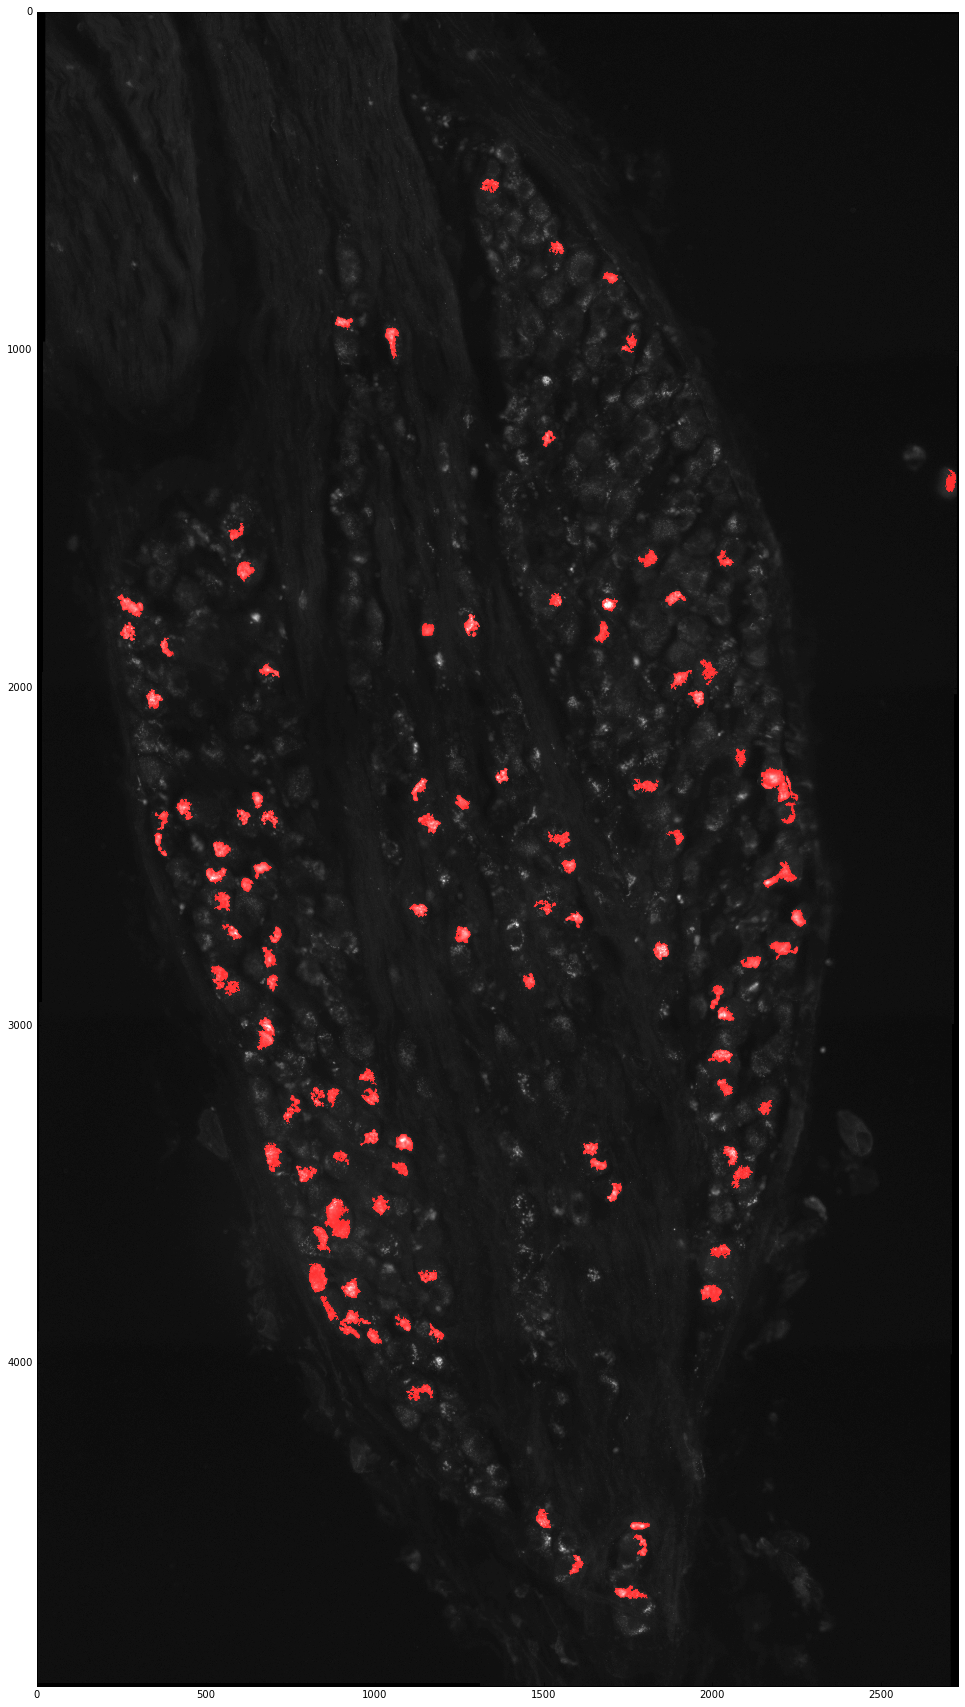

In [4]:
plt.figure(figsize=(60,30))

IMf = mh.gaussian_filter(IM, 0.5)          # applies gaussian filter
IMf = (IMf).astype('uint8')                # converts the image back to uint8 (Important)

T = mh.otsu(IMf)                           # applies otsu thresholding

Test = (IMf > T + 10)                      # shows the original image values that are greater than the threshold

labeled, n_nucleus = mh.label(Test)        # sets up the image for counting
sizes = mh.labeled.labeled_size(labeled)   # creates sizes based on the label p
too_small = np.where(sizes < 1000)         # min pixel parameter for cell size
too_large = np.where(sizes > 50000)        # max pixel paramater for cell size
labeled = mh.labeled.remove_regions(labeled, too_small) # removes regions smaller than the min
labeled = mh.labeled.remove_regions(labeled, too_large) # removes regions larger than the max

labeled, nr_nuclei = mh.label(labeled)     # finds the new cells based on the min/max parameters

print('Found {} cells.'.format(nr_nuclei)) # prints the cell count
pylab.imshow(mh.overlay(IM, labeled))      #shows the original image with a cell overlay
pylab.show()